<a href="https://colab.research.google.com/github/Amrutha-220500/git/blob/main/customer_purchasing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/Customer Purchasing Behaviors.csv')

In [ ]:
print(f"Dataset Shape: {data.shape[0]} rows, {data.shape[1]} columns")


Dataset Shape: 238 rows, 7 columns


In [ ]:
print(data.columns.tolist())

['user_id', 'age', 'annual_income', 'purchase_amount', 'loyalty_score', 'region', 'purchase_frequency']


In [ ]:
print(data.head())

   user_id  age  annual_income  purchase_amount  loyalty_score region  \
0        1   25          45000              200            4.5  North   
1        2   34          55000              350            7.0  South   
2        3   45          65000              500            8.0   West   
3        4   22          30000              150            3.0   East   
4        5   29          47000              220            4.8  North   

   purchase_frequency  
0                  12  
1                  18  
2                  22  
3                  10  
4                  13  


In [ ]:
print(data.dtypes)

user_id                 int64
age                     int64
annual_income           int64
purchase_amount         int64
loyalty_score         float64
region                 object
purchase_frequency      int64
dtype: object


In [ ]:
print(data.isnull().sum())


user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64


In [ ]:
num_cols = data.select_dtypes(include=np.number).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())


In [ ]:
cat_cols = data.select_dtypes(include='object').columns

for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)


/tmp/ipython-input-786544589.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
data.isnull().sum()


,0
user_id,0
age,0
annual_income,0
purchase_amount,0
loyalty_score,0
region,0
purchase_frequency,0


In [ ]:
data[num_cols].mean()


,0
user_id,119.500000
age,38.676471
annual_income,57407.563025
purchase_amount,425.630252
loyalty_score,6.794118
purchase_frequency,19.798319


In [ ]:
data[num_cols].median()


,0
user_id,119.5
age,39.0
annual_income,59000.0
purchase_amount,440.0
loyalty_score,7.0
purchase_frequency,20.0


In [ ]:
data[num_cols].std()


,0
user_id,68.848868
age,9.351118
annual_income,11403.875717
purchase_amount,140.052062
loyalty_score,1.899047
purchase_frequency,4.562884


In [ ]:
data[num_cols].agg(['min', 'max'])


,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
min,1,22,30000,150,3.0,10
max,238,55,75000,640,9.5,28


In [ ]:
data.describe()


,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


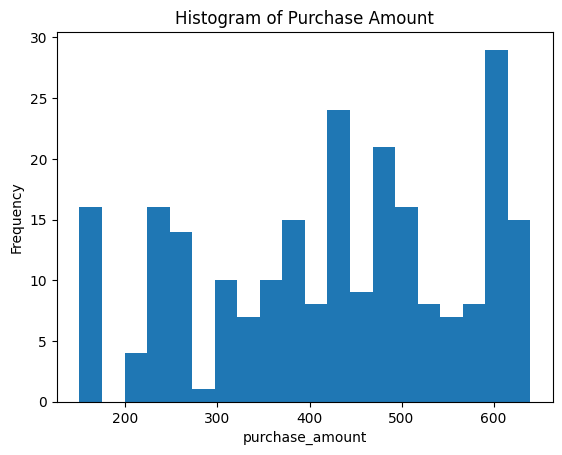

In [ ]:
plt.figure()
plt.hist(data['purchase_amount'], bins=20)
plt.xlabel('purchase_amount')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase Amount')
plt.show()


In [ ]:
data


,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13
...,...,...,...,...,...,...,...
233,234,40,60000,450,7.2,West,20
234,235,38,59000,430,6.9,North,20
235,236,54,74000,630,9.4,South,27
236,237,32,52000,360,5.8,West,18


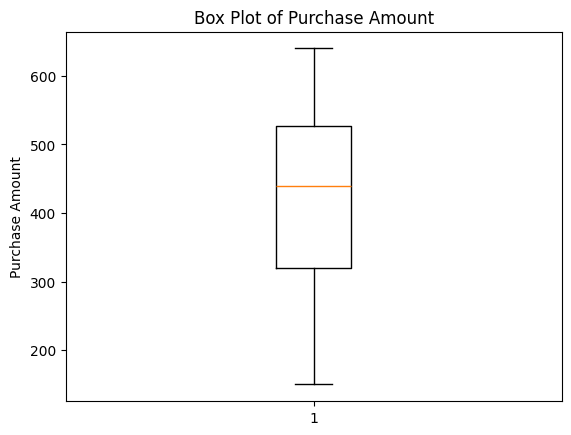

In [ ]:
plt.figure()
plt.boxplot(data['purchase_amount'])
plt.ylabel('Purchase Amount')
plt.title('Box Plot of Purchase Amount')
plt.show()


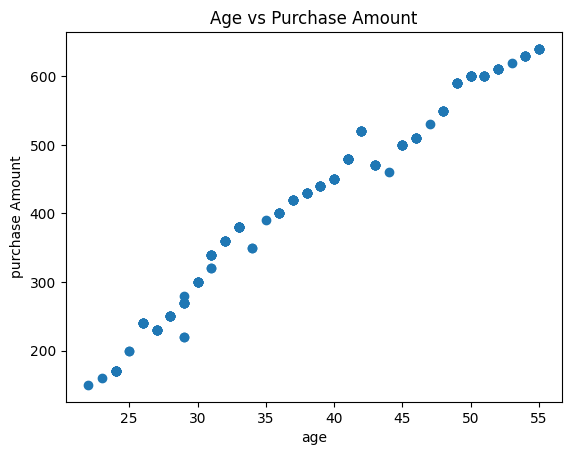

In [ ]:
plt.figure()
plt.scatter(data['age'], data['purchase_amount'])
plt.xlabel('age')
plt.ylabel('purchase Amount')
plt.title('Age vs Purchase Amount')
plt.show()


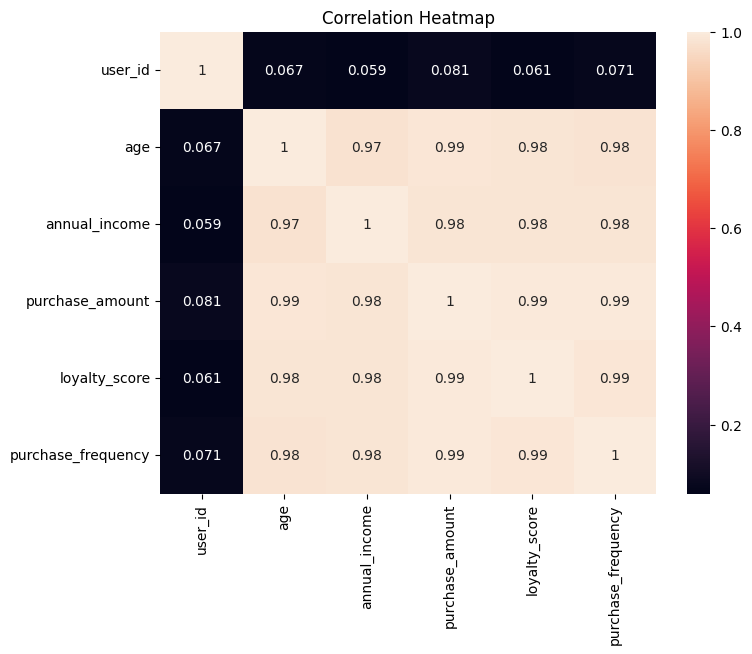

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data[num_cols].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()
